In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Carga del archivo
El archivo que se encontraba en aula virtual era un .xlsx pero al abrirlo,  aparecia como si fuese separados por comas. Por suerte encontre en Kaggle el dataset original, decidi subirlo a mi Github y utilizarlo desde la nube.

In [2]:
df = pd.read_csv("https://media.githubusercontent.com/media/fowardelcac/Tp2_sem/refs/heads/main/winemag-data-130k-v2.csv").drop('Unnamed: 0', axis = 1)

### Previsualizacion del dataset

In [3]:
df.head(2)

,country,description,designation,points,price,province,region_1,region_2,taster_name,taster_twitter_handle,title,variety,winery
0,Italy,"Aromas include tropical fruit, broom, brimston...",Vulkà Bianco,87,NaN,Sicily & Sardinia,Etna,NaN,Kerin O’Keefe,@kerinokeefe,Nicosia 2013 Vulkà Bianco (Etna),White Blend,Nicosia
1,Portugal,"This is ripe and fruity, a wine that is smooth...",Avidagos,87,15.0,Douro,NaN,NaN,Roger Voss,@vossroger,Quinta dos Avidagos 2011 Avidagos Red (Douro),Portuguese Red,Quinta dos Avidagos


### Cantidad de datos, número de columnas y tipos de datos presentes en el conjunto de datos.
- Existe un total de 129971 filas de datos
- 12 columnas, donde la mayoria son vairables categoricas excepto dos variables numericas:
    - Points: Puntuacion recibida
    - Price: Precio del vino

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 129971 entries, 0 to 129970
Data columns (total 13 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   country                129908 non-null  object 
 1   description            129971 non-null  object 
 2   designation            92506 non-null   object 
 3   points                 129971 non-null  int64  
 4   price                  120975 non-null  float64
 5   province               129908 non-null  object 
 6   region_1               108724 non-null  object 
 7   region_2               50511 non-null   object 
 8   taster_name            103727 non-null  object 
 9   taster_twitter_handle  98758 non-null   object 
 10  title                  129971 non-null  object 
 11  variety                129970 non-null  object 
 12  winery                 129971 non-null  object 
dtypes: float64(1), int64(1), object(11)
memory usage: 12.9+ MB


Valores faltantes por columna

In [5]:
print("Valores nulos por columna: \n", df.isnull().sum())

Valores nulos por columna: 
 country                     63
description                  0
designation              37465
points                       0
price                     8996
province                    63
region_1                 21247
region_2                 79460
taster_name              26244
taster_twitter_handle    31213
title                        0
variety                      1
winery                       0
dtype: int64


# Análisis exploratorio de datos

El dataset contiene distintas columnas categoricas, dentro de ellas se encuentran los paises donde proviene el vino:

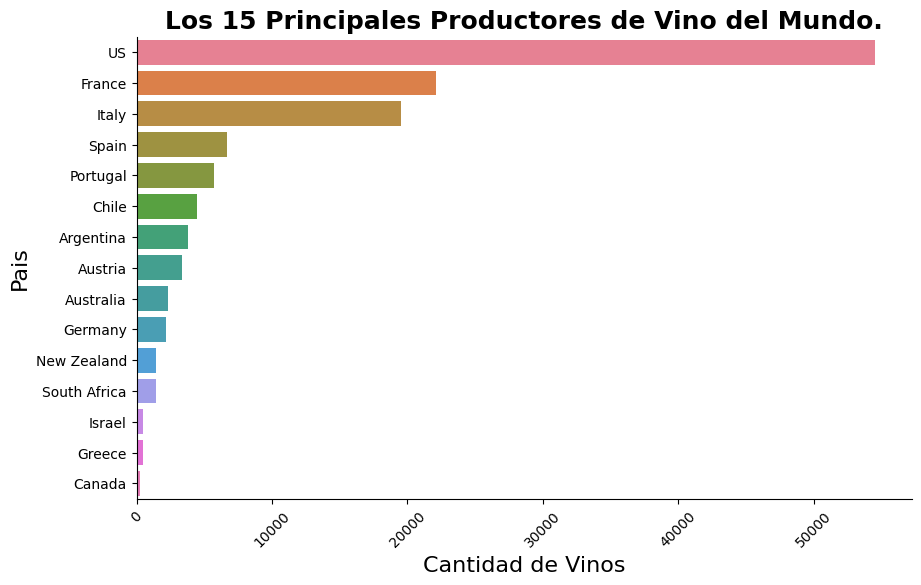

In [6]:
pais_counts = df['country'].value_counts().head(15)

plt.figure(figsize=(10, 6))
sns.barplot(y=pais_counts.index, x=pais_counts.values, hue=pais_counts.index)

plt.title("Los 15 Principales Productores de Vino del Mundo.", fontsize=18, weight='bold')

plt.xlabel('Cantidad de Vinos', fontsize=16)
plt.ylabel('Pais', fontsize=16)
plt.xticks(rotation=45)

ax = plt.gca()
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

plt.show()

Y dentro de los datos geograficos, el dataset contiene una mayor granularidad geografica con informacion de la provincia y region de la cual proviene el producto

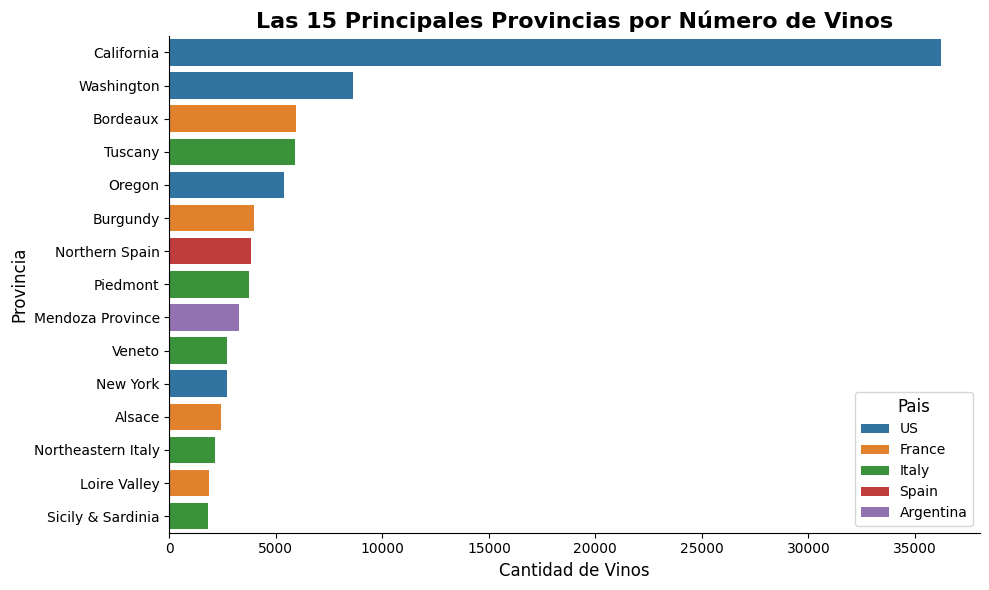

In [7]:
province_counts = df.groupby(['province', 'country'])["province"].count().sort_values(ascending=False).head(15).reset_index(name="Count")


plt.figure(figsize=(10, 6))

# Crear el gráfico de barras coloreado por país
sns.barplot(y='province', x='Count', hue='country', data=province_counts)

# Personalizar el gráfico
plt.title('Las 15 Principales Provincias por Número de Vinos', fontsize=16, weight='bold')
plt.xlabel('Cantidad de Vinos', fontsize=12)
plt.ylabel('Provincia', fontsize=12)
plt.legend(title='Pais', fontsize=10, title_fontsize=12)

# Mejorar el layout y mostrar el gráfico
ax = plt.gca()
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
plt.tight_layout()
plt.show()
     

In [8]:
df.region_1.value_counts().to_frame().head()

,count
region_1,
Napa Valley,4480
Columbia Valley (WA),4124
Russian River Valley,3091
California,2629
Paso Robles,2350


Cada fila del dataset es una una reseña hecha por un catador, primero tenemos la description(reseña) escrita por el somellier:

In [9]:
df.description

0         Aromas include tropical fruit, broom, brimston...
1         This is ripe and fruity, a wine that is smooth...
2         Tart and snappy, the flavors of lime flesh and...
3         Pineapple rind, lemon pith and orange blossom ...
4         Much like the regular bottling from 2012, this...
                                ...                        
129966    Notes of honeysuckle and cantaloupe sweeten th...
129967    Citation is given as much as a decade of bottl...
129968    Well-drained gravel soil gives this wine its c...
129969    A dry style of Pinot Gris, this is crisp with ...
129970    Big, rich and off-dry, this is powered by inte...
Name: description, Length: 129971, dtype: object

Como informacion del sommelier contiene:
- taster_name: Nombre del sommelier
- taster_twitter_handle: Red social del somellier

Ademas, los catadores agregan informacion sobre:
- designation: Viñedo específico dentro de la bodega
- title: El título de la reseña
- variety: Variedad de uva
- winery: Bodega productora



In [10]:
print("Variedad de uva mas comunes: ")
df.variety.value_counts().sort_values(ascending=False).to_frame().head(20)

Variedad de uva mas comunes: 


,count
variety,
Pinot Noir,13272
Chardonnay,11753
Cabernet Sauvignon,9472
Red Blend,8946
Bordeaux-style Red Blend,6915
Riesling,5189
Sauvignon Blanc,4967
Syrah,4142
Rosé,3564


In [11]:
print("Bodegas con mayor produccion: ")
df.winery.value_counts().sort_values(ascending=False).to_frame().head(20)

Bodegas con mayor produccion: 


,count
winery,
Wines & Winemakers,222
Testarossa,218
DFJ Vinhos,215
Williams Selyem,211
Louis Latour,199
Georges Duboeuf,196
Chateau Ste. Michelle,194
Concha y Toro,164
Columbia Crest,159


Por ultimo, el dataset contiene dos columnas categoricas:

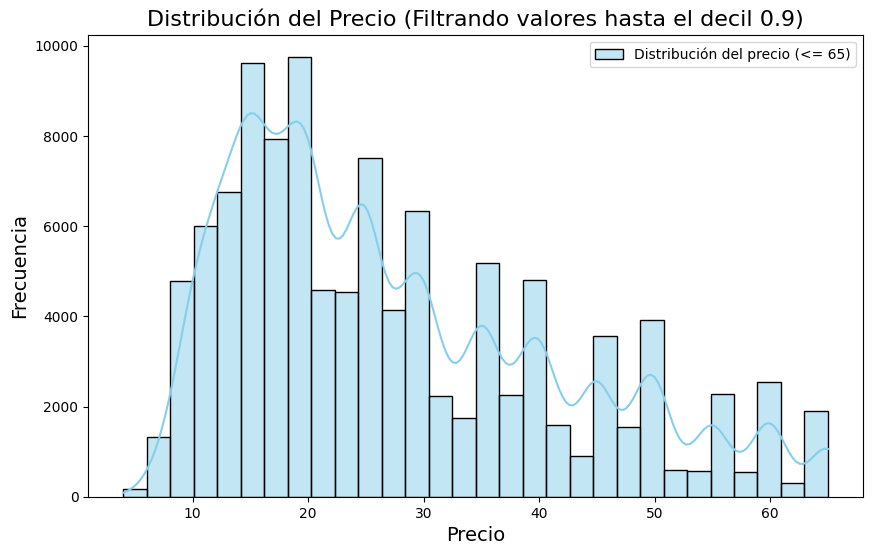

In [12]:
price_filter = df.loc[df.price <= 65]['price']

# Crear el gráfico con Seaborn
plt.figure(figsize=(10, 6))  # Tamaño de la figura
sns.histplot(price_filter, kde=True, color="skyblue", bins=30, label="Distribución del precio (<= 65)")

# Configurar títulos y etiquetas
plt.title("Distribución del Precio (Filtrando valores hasta el decil 0.9)", fontsize=16)
plt.xlabel("Precio", fontsize=14)
plt.ylabel("Frecuencia", fontsize=14)

# Mostrar leyenda
plt.legend()

# Mostrar gráfico
plt.show()

In [13]:
print("Paises con vinos mas caros: ")
df.groupby('country')['price'].max().sort_values(ascending=False).to_frame().head(15)

Paises con vinos mas caros: 


,price
country,
France,3300.0
US,2013.0
Austria,1100.0
Portugal,1000.0
Italy,900.0
Australia,850.0
Germany,775.0
Spain,770.0
Hungary,764.0


C:\Users\USUARIO\AppData\Local\Temp\ipykernel_5852\1286197045.py:9: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


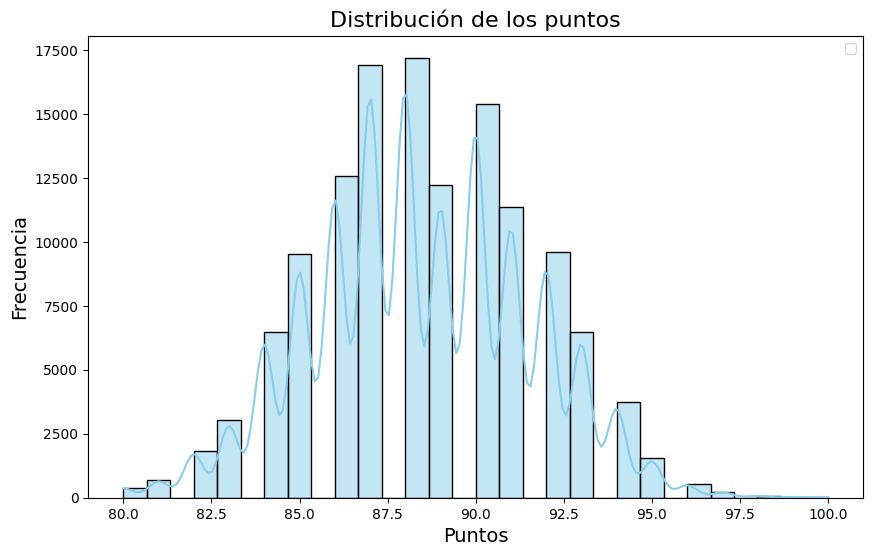

In [14]:
plt.figure(figsize=(10, 6))
sns.histplot(df.points, kde=True, color="skyblue", bins=30,)

plt.title("Distribución de los puntos", fontsize=16)
plt.xlabel("Puntos", fontsize=14)
plt.ylabel("Frecuencia", fontsize=14)

# Mostrar leyenda
plt.legend()

# Mostrar gráfico
plt.show()

In [15]:
print("Paises con vinos de mejor puntuacion en promedio: ")
df.groupby('country')['points'].mean().sort_values(ascending=False).to_frame().head(15)

Paises con vinos de mejor puntuacion en promedio: 


,points
country,
England,91.581081
India,90.222222
Austria,90.101345
Germany,89.851732
Canada,89.369650
Hungary,89.191781
China,89.000000
France,88.845109
Luxembourg,88.666667


# Tratamiento de datos faltantes

In [16]:
print("Valores nulos por columna: \n", df.isnull().sum())

Valores nulos por columna: 
 country                     63
description                  0
designation              37465
points                       0
price                     8996
province                    63
region_1                 21247
region_2                 79460
taster_name              26244
taster_twitter_handle    31213
title                        0
variety                      1
winery                       0
dtype: int64


En la columna country existe una cantidad insignificante de valores nulos por lo tanto, decido eliminarlos.  Ademas, elimino los valores nulos en designation ya que el viñedo, es lo que caracteriza cada vino y desde mi punto de vista no tiene sentido buscar inferir/inventar datos en esta columna clave.

In [17]:
rows_count = 129971
country_nulls = 63
print(f"En la columna 'country' los valores nulos representan el: {(country_nulls / rows_count) * 100:.2f}%")

En la columna 'country' los valores nulos representan el: 0.05%


In [18]:
df = df.copy()
df.drop_duplicates(inplace=True)
df_filter = df.dropna(subset=['country', 'designation'])
df_filter.head()

,country,description,designation,points,price,province,region_1,region_2,taster_name,taster_twitter_handle,title,variety,winery
0,Italy,"Aromas include tropical fruit, broom, brimston...",Vulkà Bianco,87,NaN,Sicily & Sardinia,Etna,NaN,Kerin O’Keefe,@kerinokeefe,Nicosia 2013 Vulkà Bianco (Etna),White Blend,Nicosia
1,Portugal,"This is ripe and fruity, a wine that is smooth...",Avidagos,87,15.0,Douro,NaN,NaN,Roger Voss,@vossroger,Quinta dos Avidagos 2011 Avidagos Red (Douro),Portuguese Red,Quinta dos Avidagos
3,US,"Pineapple rind, lemon pith and orange blossom ...",Reserve Late Harvest,87,13.0,Michigan,Lake Michigan Shore,NaN,Alexander Peartree,NaN,St. Julian 2013 Reserve Late Harvest Riesling ...,Riesling,St. Julian
4,US,"Much like the regular bottling from 2012, this...",Vintner's Reserve Wild Child Block,87,65.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,Sweet Cheeks 2012 Vintner's Reserve Wild Child...,Pinot Noir,Sweet Cheeks
5,Spain,Blackberry and raspberry aromas show a typical...,Ars In Vitro,87,15.0,Northern Spain,Navarra,NaN,Michael Schachner,@wineschach,Tandem 2011 Ars In Vitro Tempranillo-Merlot (N...,Tempranillo-Merlot,Tandem


In [19]:
df_filter.describe()

,points,price
count,85394.000000,79488.000000
mean,88.745732,37.810135
std,3.091128,37.091708
min,80.000000,4.000000
25%,87.000000,18.000000
50%,89.000000,29.000000
75%,91.000000,46.000000
max,100.000000,2013.000000


In [20]:
df_filter.price.median()

np.float64(29.0)

In [21]:
def random_imputer(df_filter, col):
    # Selecciona valores no nulos de la columna para la imputación
    non_null_values = df_filter[col].dropna().values

    # Aplica un valor aleatorio de non_null_values donde hay NaN en la columna
    df_filter.loc[:, col] = df_filter[col].apply(
        lambda x: np.random.choice(non_null_values) if pd.isnull(x) else x
    )
    
    return df_filter

El precio esta muy influenciado por valores muy grandes. Como muestra el siguiente grafico

<Axes: ylabel='Frequency'>

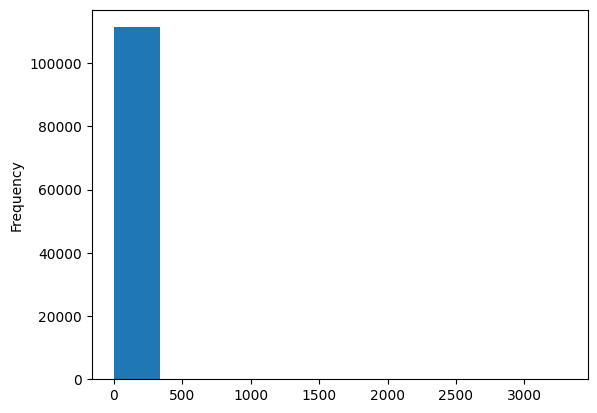

In [22]:
df.price.plot(kind="hist")

Si eliminamos los valores menos al decil 0.9

<Axes: ylabel='Frequency'>

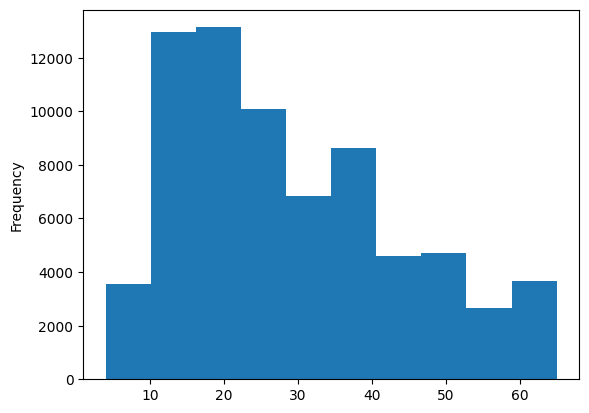

In [23]:
df_filter.loc[df_filter.price <= 65]['price'].plot(kind="hist")

In [24]:
df_filter = random_imputer(df_filter, 'price')

<Axes: ylabel='Frequency'>

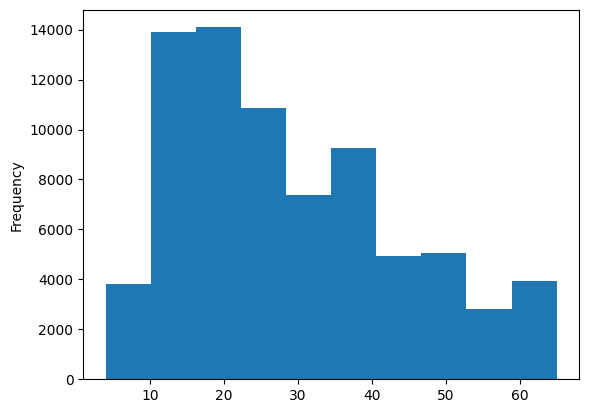

In [25]:
df_filter.loc[df_filter.price <= 65]['price'].plot(kind="hist")

Mi primera opcion fue utlizar sklearn imputer para modifcar los valores faltantes con la media/mediana, pero generaba mucha distrorcion dentro del dataset. Decidi cambiar el enfoque y añadir valores de manera aleatoria pertenecientes a la distribucion, si vuelvo a realizar el grafico, es muy similar.  Con respecto a los valores muy grandes, no deberian ser eliminados aunque puedan sesgar el dataset, ya que los vinos con alto valor contienen cualidades premium.


El resto de valores como los de la region, taster_name y taster_twitter_handle son datos categoricos los cuales en caso de ser modifcados y agregar inforamcion aleatoria, seria como estar inventando informacion

# Análisis de datos atípicos

En la columna de precios es muy claro la existencia de outliers, es mas facil interpetarlo con graficos:

<Axes: xlabel='price'>

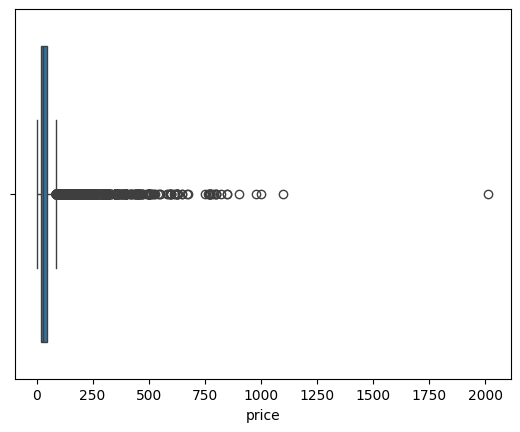

In [27]:
sns.boxplot(x='price', data=df_filter)

<Axes: xlabel='price'>

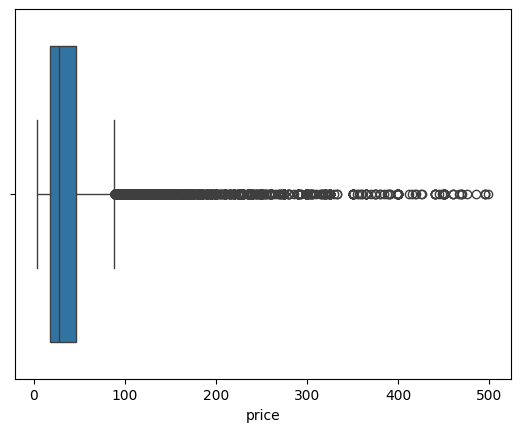

In [29]:
filtered_data = df_filter[df_filter['price'] < 500]  # Excluir precios mayores a 500
sns.boxplot(x='price', data=filtered_data)

In [40]:
decil_99th = df_filter['price'].quantile(0.99)
df_filter[decil_99th < df_filter.price].count()

country                  842
description              842
designation              842
points                   842
price                    842
province                 842
region_1                 714
region_2                 201
taster_name              674
taster_twitter_handle    636
title                    842
variety                  842
winery                   842
log_price                842
dtype: int64

Observando el boxplot y el grafico de barras anterior, es posible ver que existe una gran cantidad de datos extremos. Si observamos el percentil 99 de la variable precio, lo que implica que el 99% de los datos están por debajo de este valor, se puede distinguir un total de 823 valores mayores a 126.  No significa que sean datos erroneos, esto suguiere principalemnete que existen vinos  'premium' y por sus catacteristicas o cuestiones particulares, tienen un valor elevado. Como tratarlos depende del objetivo del analisis: Si es para realizar visualizaciones se pueden omitir o seleccionar un umbral como hice anteriormente y filtrar por valores menors/mayores a cierto umbral. Si el objetivo esta centrado en modelos predictivos, la mejor opcion deberia ser elegir un modelo como Arboles de desicion o modelos no sensibles a datos extremos y estandarizar los datos; todo depende del enfque del analisis.